<a href="https://colab.research.google.com/github/Gym-Mentor/danakka/blob/master/%EB%8B%A4%EB%82%98%EA%B9%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Copy data zip files to Colab working space

In [ ]:
!cp -r '/content/drive/My Drive/Copy_of_fish_data_small.zip' fish_data_small.zip
!cp -r '/content/drive/My Drive/Copy_of_fish_data.zip' fish_data.zip

# Extract zip files

In [ ]:
!unzip /content/fish_data_small.zip
!unzip /content/fish_data.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (88).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (89).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (9).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (90).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (91).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (92).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (93).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (94).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (95).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (96).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (97).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (98).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (99).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤6 (1).jpg  
  inflating: fish_data/train/2_Thom_bang_y

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import backend as K

In [ ]:
# // train_data path
train_path = "/content/fish_data/train/"
#// test_data path
test_path="/content/fish_data/test/"

# Get the data labels

In [ ]:
labels=[]
label_paths = glob.glob(train_path+"*")
for t_path in label_paths:
    labels.append(t_path[len(train_path):])
labels.sort()
print(labels)

['10_Kanari', '1_Ko_dung_uh', '2_Thom_bang_yi', '3_Bang_uh_dom', '4_Bum-dom', '5_Yong-chi', '6_Cham_dom', '7_Jul_jun', '8_Gam_sung_dom', '9_Nong_uh']


# Load training data

In [ ]:
picture_size = 150
train_data = []
train_data_label =[]

for label in labels:
    print (label)
    img_files = glob.glob(train_path+label+"/*.*")
    num_label = labels.index(label)
    print("data size for " + label + " : " + str(len(img_files)))
    for img_file in img_files:
        #print("loading "+img_file)
        img = cv2.imread(img_file)
        img = cv2.resize(img,(picture_size,picture_size))
        train_data.append(img)
        train_data_label.append(num_label)

10_Kanari
data size for 10_Kanari : 701
1_Ko_dung_uh
data size for 1_Ko_dung_uh : 701
2_Thom_bang_yi
data size for 2_Thom_bang_yi : 695
3_Bang_uh_dom
data size for 3_Bang_uh_dom : 704
4_Bum-dom
data size for 4_Bum-dom : 705
5_Yong-chi
data size for 5_Yong-chi : 694
6_Cham_dom
data size for 6_Cham_dom : 704
7_Jul_jun
data size for 7_Jul_jun : 700
8_Gam_sung_dom
data size for 8_Gam_sung_dom : 706
9_Nong_uh
data size for 9_Nong_uh : 701


Label:  1_Ko_dung_uh


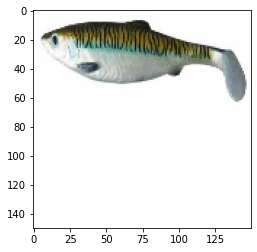

In [ ]:
plt.imshow(train_data[1000])
print("Label: ", labels[train_data_label[1000]])
plt.show()

In [ ]:
len(train_data)

7011

In [ ]:
train_data[0].shape

(150, 150, 3)

# Load test data

In [ ]:
picture_size = 150
test_data = []
test_data_label =[]

for label in labels:
    print (label)
    img_files = glob.glob(test_path+label+"/*.*")
    num_label = labels.index(label)
    print("data size for " + label + " : " + str(len(img_files)))
    for img_file in img_files:
        img = cv2.imread(img_file)
        img = cv2.resize(img,(picture_size,picture_size))
        test_data.append(img)
        test_data_label.append(num_label)

10_Kanari
data size for 10_Kanari : 20
1_Ko_dung_uh
data size for 1_Ko_dung_uh : 20
2_Thom_bang_yi
data size for 2_Thom_bang_yi : 20
3_Bang_uh_dom
data size for 3_Bang_uh_dom : 20
4_Bum-dom
data size for 4_Bum-dom : 20
5_Yong-chi
data size for 5_Yong-chi : 20
6_Cham_dom
data size for 6_Cham_dom : 20
7_Jul_jun
data size for 7_Jul_jun : 20
8_Gam_sung_dom
data size for 8_Gam_sung_dom : 20
9_Nong_uh
data size for 9_Nong_uh : 20


In [ ]:
len(test_data)

200

In [ ]:
test_data[0].shape

(150, 150, 3)

# Data preparation

In [ ]:
x = np.array(train_data)
y = np.array(train_data_label)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2,random_state = 230)
Y_train = to_categorical(y_train, len(labels))
Y_val = to_categorical(y_val, len(labels))


X_test = np.array(test_data)
y_test = np.array(test_data_label)
Y_test = to_categorical(y_test, len(labels))

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# for training data, we apply normalize, randomly rotate, shift and flip, etc.

val_test_datagen = ImageDataGenerator(rescale=1./255.)
# for validation and test sets, we only normalize

train_generator = train_datagen.flow(X_train,Y_train,batch_size=64)
validation_generator = val_test_datagen.flow(X_val,Y_val,batch_size=64)
test_generator = val_test_datagen.flow(X_test,Y_test,batch_size=64)

# Build model

In [ ]:
# Build the model here!
# Build the model here!
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))
conv_base.trainable=True

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dense(2048,activation='relu'))
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
from keras.models import load_model
model=load_model("/content/drive/My Drive/Colab Notebooks/my_fish_model.h5")
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/Colab Notebooks/my_fish_model.h5",
    monitor='acc',verbose=1,save_best_only=True)
 
history = model.fit_generator(
      train_generator,
      epochs=20,
      validation_data=validation_generator,
      callbacks=[checkpoint_cb])

Epoch 1/20
88/88 [==============================] - ETA: 0s - loss: 0.0670 - acc: 0.9888
Epoch 00001: acc improved from -inf to 0.98877, saving model to /content/drive/My Drive/Colab Notebooks/my_fish_model.h5
88/88 [==============================] - 49s 554ms/step - loss: 0.0670 - acc: 0.9888 - val_loss: 0.3454 - val_acc: 0.9608
Epoch 2/20
88/88 [==============================] - ETA: 0s - loss: 0.0241 - acc: 0.9920
Epoch 00002: acc improved from 0.98877 to 0.99198, saving model to /content/drive/My Drive/Colab Notebooks/my_fish_model.h5
88/88 [==============================] - 50s 564ms/step - loss: 0.0241 - acc: 0.9920 - val_loss: 0.3980 - val_acc: 0.9615
Epoch 3/20
88/88 [==============================] - ETA: 0s - loss: 0.0328 - acc: 0.9913
Epoch 00003: acc did not improve from 0.99198
88/88 [==============================] - 48s 541ms/step - loss: 0.0328 - acc: 0.9913 - val_loss: 0.5730 - val_acc: 0.9508
Epoch 4/20
88/88 [==============================] - ETA: 0s - loss: 0.0318 -

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 4096)              33558528  
_________________________________________________________________
dense_14 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10250     
Total params: 58,772,298
Trainable params: 58,772,298
Non-trainable params: 0
__________________________________________

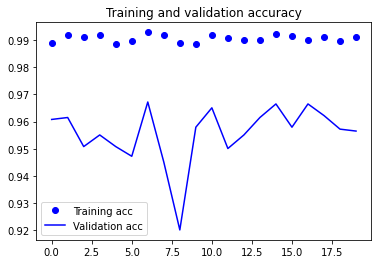

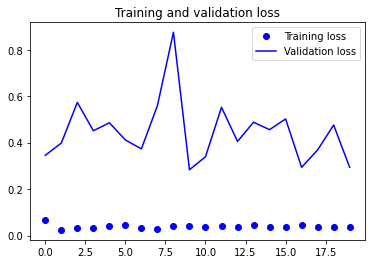

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Train model

In [ ]:
# Compile and train the model here!

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/my_fish_model.h5")

In [ ]:
new_model.evaluate(test_generator)

4/4 [==============================] - 0s 78ms/step - loss: 0.1682 - acc: 0.9800


[0.16816072165966034, 0.9800000190734863]